In [1]:
# load neuromaps
# convert to volumetric
# save as nifti 1mm and 2mm

In [33]:
import nibabel as nib
import numpy as np
import neuromaps
from neuromaps import datasets

from neuromaps.datasets import fetch_annotation
from netneurotools import datasets as nntdata
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti

from nilearn import image, plotting
from surfplot import Plot
from neuromaps.datasets import fetch_fslr
from neuromaps.transforms import fsaverage_to_fslr
from os.path import join
import glob

In [6]:
annotations = datasets.available_annotations()

In [7]:
annotations

[('abagen', 'genepc1', 'fsaverage', '10k'),
 ('aghourian2017', 'feobv', 'MNI152', '1mm'),
 ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'),
 ('bedard2019', 'feobv', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'fsaverage', '164k'),
 ('beliveau2017', 'cimbi36', 'MNI152', '1mm'),
 ('beliveau2017', 'cimbi36', 'fsaverage', '164k'),
 ('beliveau2017', 'cumi101', 'MNI152', '1mm'),
 ('beliveau2017', 'cumi101', 'fsaverage', '164k'),
 ('beliveau2017', 'dasb', 'MNI152', '1mm'),
 ('beliveau2017', 'dasb', 'fsaverage', '164k'),
 ('beliveau2017', 'sb207145', 'MNI152', '1mm'),
 ('beliveau2017', 'sb207145', 'fsaverage', '164k'),
 ('ding2010', 'mrb', 'MNI152', '1mm'),
 ('dubois2015', 'abp688', 'MNI152', '1mm'),
 ('dukart2018', 'flumazenil', 'MNI152', '3mm'),
 ('dukart2018', 'fpcit', 'MNI152', '3mm'),
 ('fazio2016', 'madam', 'MNI152', '3mm'),
 ('finnema2016', 'ucbj', 'MNI152', '1mm'),
 ('gallezot2010', 'p943', 'MNI152', '1mm'),
 ('gallezot2017', 'g

In [8]:
tags = datasets.available_tags()
print(tags)

['ASL', 'MEG', 'MRI', 'PET', 'fMRI', 'functional', 'genetics', 'meta-analysis', 'receptors', 'structural']


In [9]:
r_annotations = datasets.available_annotations(tags='receptors')
print(r_annotations)

[('aghourian2017', 'feobv', 'MNI152', '1mm'), ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'), ('bedard2019', 'feobv', 'MNI152', '1mm'), ('beliveau2017', 'az10419369', 'MNI152', '1mm'), ('beliveau2017', 'az10419369', 'fsaverage', '164k'), ('beliveau2017', 'cimbi36', 'MNI152', '1mm'), ('beliveau2017', 'cimbi36', 'fsaverage', '164k'), ('beliveau2017', 'cumi101', 'MNI152', '1mm'), ('beliveau2017', 'cumi101', 'fsaverage', '164k'), ('beliveau2017', 'dasb', 'MNI152', '1mm'), ('beliveau2017', 'dasb', 'fsaverage', '164k'), ('beliveau2017', 'sb207145', 'MNI152', '1mm'), ('beliveau2017', 'sb207145', 'fsaverage', '164k'), ('ding2010', 'mrb', 'MNI152', '1mm'), ('dubois2015', 'abp688', 'MNI152', '1mm'), ('dukart2018', 'flumazenil', 'MNI152', '3mm'), ('dukart2018', 'fpcit', 'MNI152', '3mm'), ('fazio2016', 'madam', 'MNI152', '3mm'), ('gallezot2010', 'p943', 'MNI152', '1mm'), ('gallezot2017', 'gsk189254', 'MNI152', '1mm'), ('hesse2017', 'methylreboxetine', 'MNI152', '3mm'), ('hillmer2016', 'flubatin

In [10]:
kantonen2020 = datasets.fetch_annotation(source=['kantonen2020', 'carfentanil', 'MNI152', '3mm'])

('kantonen2020', 'carfentanil', 'MNI152', '3mm')	PET tracer binding (BPnd) to MOR (mu-opioid receptor)	receptors; PET	204 (132)	32.3 +/- 10.8	Kantonen et al., 2020, Neuroimage (doi.org/10.1016/j.neuroimage.2020.116922)

('turtonen2020', 'carfentanil', 'MNI152', '1mm')	PET tracer binding (BPnd) to MOR (mu-opioid receptor)	receptors; PET	39 (19)	39.38 +/- 5.05	Turtonen et al., 2021, Biol Psychiatry Cogn Neurosci Neuroimaging (doi.org/10.1016/j.bpsc.2020.10.013v)
('vijay2018', 'ly2795050', 'MNI152', '2mm')	PET tracer binding (Vt) to KOR (kappa-opioid receptor)	receptors; PET	28 (19)	33.5 +/- 11.3	Vijay et al., 2018, Neuropsychopharmacology (https://doi.org/10.1038/s41386-018-0199-1)

In [29]:

fcgradient = fetch_annotation(source='margulies2016', desc='fcgradient01', space='fsLR', den='32k')
schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
fc_grad_parc = parc.fit_transform(fcgradient, 'fsLR')
grad_img1 = parc.inverse_transform(fc_grad_parc)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_4790/4079933397.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


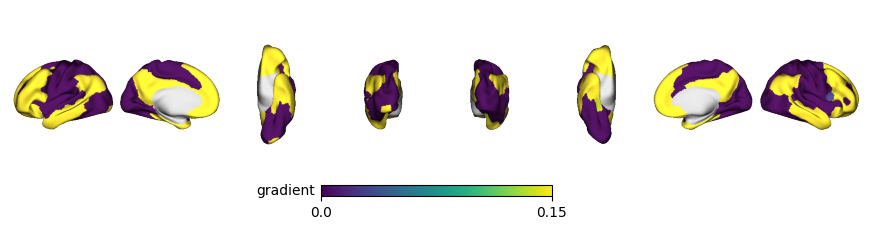

In [31]:
surfaces_fslr = fetch_fslr()
lh_fslr, rh_fslr = surfaces_fslr['inflated']

color_range = (0,.15)
p = Plot(surf_lh=lh_fslr,
            surf_rh=rh_fslr, 
            size=(1000, 200), 
            zoom=1.2, layout='row', 
            views=['lateral', 'medial', 'ventral', 'posterior'], 
            mirror_views=True, brightness=.7)
p.add_layer({'left': grad_img1[0], 
            'right': grad_img1[1]}, 
            cmap='viridis', cbar=True,
            color_range=color_range,
            cbar_label='gradient'
            ) # YlOrRd_r
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
fig = p.build(cbar_kws=cbar_kws)
fig.show()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_4790/3607763064.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


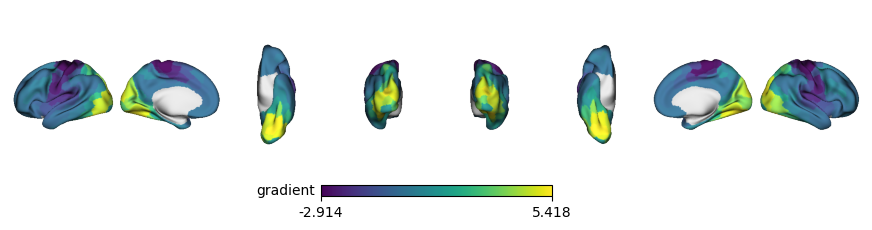

In [41]:

fcgradient = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
fc_grad_parc = parc.fit_transform(fcgradient, 'fsLR')
grad_img2 = parc.inverse_transform(fc_grad_parc)

surfaces_fslr = fetch_fslr()
lh_fslr, rh_fslr = surfaces_fslr['inflated']

# color_range = (0,.15)
p = Plot(surf_lh=lh_fslr,
            surf_rh=rh_fslr, 
            size=(1000, 200), 
            zoom=1.2, layout='row', 
            views=['lateral', 'medial', 'ventral', 'posterior'], 
            mirror_views=True, brightness=.7)
p.add_layer({'left': grad_img2[0], 
            'right': grad_img2[1]}, 
            cmap='viridis', cbar=True,
            # color_range=color_range,
            cbar_label='gradient'
            ) # YlOrRd_r
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
fig = p.build(cbar_kws=cbar_kws)
fig.show()

In [48]:
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/'
sub = "sub-0101"

flist = glob.glob(join(singletrial_dir, sub, f"{sub}_ses-*_run-*_runtype-pain_event-stimulus_trial-*_cuetype-*_stimintensity-*.nii.gz"))
# load all the images -> average -> transform to fslr
# all_imgs = image.concat_imgs(flist)
# mean_img = image.mean_img(all_imgs)
# sub101 = neuromaps.transforms.mni152_to_fslr(mean_img, fslr_density='32k', method='linear')
# mean_img is now a NIfTI-like image containing the average of all input images
# parcellate per single trial
parcelarray = []
for fname in flist:
    singletrialFSLR = neuromaps.transforms.mni152_to_fslr(fname, fslr_density='32k', method='linear')
    parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
    singletrial_parc = parc.fit_transform(singletrialFSLR, 'fsLR')
    parcelarray.append(singletrial_parc)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

In [56]:
average_parcel = np.vstack(parcelarray).mean(axis=0)

In [61]:
parcelarray

[array([-1.96157023e-01, -1.25555158e-01, -4.64954972e-02, -1.81173578e-01,
        -1.42580226e-01, -1.63231209e-01, -6.19847894e-01, -1.31882191e-01,
        -6.42237365e-02,  1.37850031e-01, -1.76692545e-01,  1.71252228e-02,
        -4.20949876e-01, -8.10704902e-02, -3.89553905e-01, -6.40009165e-01,
        -2.68289298e-01, -1.89363942e-01, -2.92719543e-01, -5.64810395e-01,
        -1.38244718e-01, -9.29257572e-02, -1.64463326e-01, -1.49686292e-01,
         3.01644932e-02, -2.27430522e-01, -2.45405018e-01, -2.82380372e-01,
        -1.71660259e-01, -4.84932989e-01, -1.60173714e-01, -7.02787340e-01,
        -5.86910546e-02, -2.52972811e-01, -2.69473307e-02, -2.71179467e-01,
         9.18475688e-02, -3.07337195e-01, -8.72202396e-01, -9.51308534e-02,
        -3.91262859e-01, -8.96375626e-02, -3.05152833e-01, -4.71182093e-02,
        -6.17737114e-01, -1.19970622e-03, -1.19792640e-01, -2.94604331e-01,
        -5.91860488e-02, -4.80064005e-02, -1.37944460e-01, -5.54753281e-02,
         1.3

In [58]:
average_parcel.shape

(400,)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_4790/1580222028.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


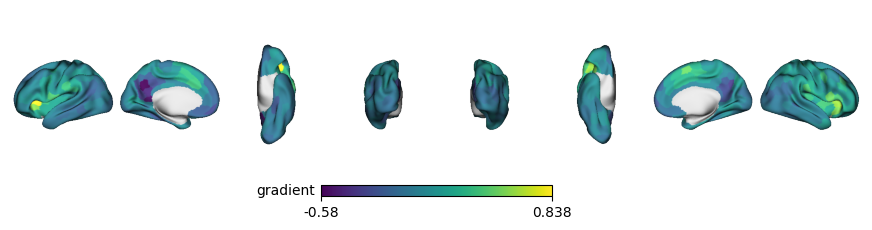

In [60]:

# fcgradient = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
# sub101_parc = parc.fit_transform(sub101, 'fsLR')
sub101_img = parc.inverse_transform(average_parcel)

surfaces_fslr = fetch_fslr()
lh_fslr, rh_fslr = surfaces_fslr['inflated']

# color_range = (0,.15)
p = Plot(surf_lh=lh_fslr,
            surf_rh=rh_fslr, 
            size=(1000, 200), 
            zoom=1.2, layout='row', 
            views=['lateral', 'medial', 'ventral', 'posterior'], 
            mirror_views=True, brightness=.7)
p.add_layer({'left': sub101_img[0], 
            'right': sub101_img[1]}, 
            cmap='viridis', cbar=True,
            # color_range=color_range,
            cbar_label='gradient'
            ) # YlOrRd_r
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
fig = p.build(cbar_kws=cbar_kws)
fig.show()